In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Job Title,Location,Job Description,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,job_simp,employee_expriece,desc_len,python,excel,sql,tableau,spark,machine learning,aws
0,Business Analyst,"Plano, TX","Hello,\r\nWe are hiring for Business System An...",5.0,Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,...,business analyst,junior_emp,1459,0,1,1,0,0,0,0
1,Business Systems Analyst,"Irvine, CA",-1,5.0,-1,-1,-1,-1,-1,-1,...,na,junior_emp,2,0,0,0,0,0,0,0
2,Business/Database Analyst,"Newark, NJ",JSR has an immediate opening for their direct ...,5.0,51 to 200 Employees,2015,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),...,na,junior_emp,4188,0,1,1,0,0,0,1
3,Data Analyst,"New York, NY",Are you someone who loves crunching numbers an...,3.5,201 to 500 Employees,1972,Nonprofit Organization,Education & Training Services,Education,$5 to $25 million (USD),...,data analyst,junior_emp,3518,0,1,0,0,0,0,0
4,Junior Business/Data Analyst,"Washington, DC","Company Overview:\r\nThe Kenific Group, Inc. (...",2.6,51 to 200 Employees,-1,Company - Private,Business Consulting,Management & Consulting,Less than $1 million (USD),...,data analyst,junior_emp,3353,0,1,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          563 non-null    object 
 1   Location           563 non-null    object 
 2   Job Description    563 non-null    object 
 3   Rating             563 non-null    float64
 4   Size               563 non-null    object 
 5   Founded            563 non-null    int64  
 6   Type of ownership  563 non-null    object 
 7   Industry           563 non-null    object 
 8   Sector             563 non-null    object 
 9   Revenue            563 non-null    object 
 10  hourly             563 non-null    int64  
 11  employer_est       563 non-null    int64  
 12  glassdoor_est      563 non-null    int64  
 13  min_salary         563 non-null    float64
 14  max_salary         563 non-null    float64
 15  avg_salary         563 non-null    float64
 16  age                563 non

In [5]:
df.columns

Index(['Job Title', 'Location', 'Job Description', 'Rating', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_est', 'glassdoor_est', 'min_salary', 'max_salary',
       'avg_salary', 'age', 'company_txt', 'State', 'job_simp',
       'employee_expriece', 'desc_len', 'python', 'excel', 'sql', 'tableau',
       'spark', 'machine learning', 'aws'],
      dtype='object')

In [6]:
df.describe()

,Rating,Founded,hourly,employer_est,glassdoor_est,min_salary,max_salary,avg_salary,age,desc_len,python,excel,sql,tableau,spark,machine learning,aws
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,3.670515,1457.793961,0.143872,0.577265,0.422735,98.753428,138.145471,118.449449,36.476021,3984.326821,0.461812,0.490231,0.523979,0.149201,0.177620,0.296625,0.273535
std,1.275076,869.017208,0.351272,0.494433,0.494433,39.176321,58.739585,47.370053,48.582623,2167.914802,0.498983,0.500349,0.499869,0.356603,0.382532,0.457176,0.446169
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,-1.000000,0.000000,0.000000,0.000000,70.000000,98.500000,83.500000,-1.000000,2410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,1971.000000,0.000000,1.000000,0.000000,90.000000,127.000000,109.000000,18.000000,4092.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,2004.000000,0.000000,1.000000,1.000000,120.000000,165.500000,141.250000,50.000000,5391.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,2022.000000,1.000000,1.000000,1.000000,300.000000,520.000000,400.000000,277.000000,13226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# choose relevant columns 
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_est','glassdoor_est',
             'State','age','python','excel','aws','sql','tableau','spark','machine learning','job_simp','employee_expriece','desc_len']]

In [8]:
# get dummy data
df_dum = pd.get_dummies(df_model)

In [11]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     5.349
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.05e-41
Time:                        17:59:54   Log-Likelihood:                -2676.3
No. Observations:                 563   AIC:                             5643.
Df Residuals:                     418   BIC:                             6271.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 48.4348      4.461     10.856      0.000      39.665      57.205
Rating                                                -1.0442      1.382     -0.756      0.450      -3.760       1.672
hourly                                               -19.2804      5.630     -3.425      0.001     -30.346      -8.215
employer_est                                          37.1361      3.313     11.211      0.000      30.625      43.648
glassdoor_est                                         11.2987      2.982      3.790      0.000       5.438      17.159
age                                                    0.0277      0.054      0.511      0.610      -0.079       0.134
python                                                -2.5441      4.303     -0.591      0.555     -11.003       5.914
excel                                                 -2.2541      3.602     -0.626      0.532      -9.333       4.825
aws                                                    4.8666      3.967      1.227      0.221      -2.931      12.664
sql                                                   -3.9843      4.018     -0.992      0.322     -11.883       3.914
tableau                                               -8.3126      5.149     -1.614      0.107     -18.434       1.809
spark                                                 17.2606      4.770      3.619      0.000       7.885      26.636
machine learning                                       2.7126      4.736      0.573      0.567      -6.596      12.021
desc_len                                               0.0006      0.001      0.634      0.526      -0.001       0.003
Size_-1                                                6.2322      3.488      1.787      0.075      -0.624      13.089
Size_1 to 50 Employees                                -6.0914      5.868     -1.038      0.300     -17.627       5.444
Size_10000+ Employees                                 -9.8758      7.175     -1.376      0.169     -23.980       4.228
Size_1001 to 5000 Employees                            6.4205      5.264      1.220      0.223      -3.926      16.767
Size_201 to 500 Employees                             19.6818      5.703      3.451      0.001       8.473      30.891
Size_5001 to 10000 Employees                           5.3147      7.932      0.670      0.503     -10.276      20.906
Size_501 to 1000 Employees                            15.8212      7.614      2.078      0.038       0.854      30.788
Size_51 to 200 Employees                               2.3081      5.402      0.427      0.669      -8.310      12.927
Size_Unknown                                           8.6234      6.697      1.288      0.199      -4.540  

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-7327397.183863518

In [14]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-22.02814615289415

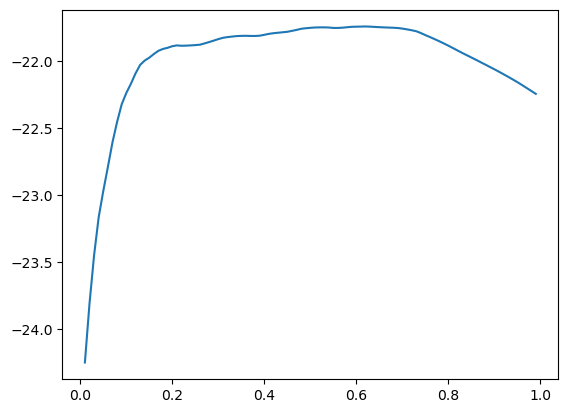

In [16]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [17]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
61,0.62,-21.740552


In [18]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-19.177233111111114

In [19]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\e

KeyboardInterrupt: 